<br><br><br><br><br>

## 오차역전파

### 역전파란? <br><br>
신경망 학습 처리에서 최소화되는 함수의 경사를 효율적으로 계산하기 위한 방법으로 "오류 역전파" 가 있다<br><br>
비용함수의기울기를계산하는방법<br><br> 1. 수치미분<br> 2. 오류역전파<br><br>
#### 오차역전파란? <br>
순전파 : 입력층 → 은닉층 → 출력층 <br>역전파 : 입력층 ← 은닉층 ← 출력층<br><br><br>
여기서 역전파를 시키는 것이 오류(오차) 입니다<br><br>
출력층부터 차례대로 역방향으로 따라 올라가 각 층에 있는 노드의 오차를 계산할 수 있다.<br> 각 노드의 오차를 계산하면 그 오차를 사용해서 함수의 기울기를 계산할 수 있다.<br><br>
"즉 전파된 오차를 이용해서 가중치를 조정한다"<br>　　　　↓      <br> "오류(오차) 역전파"<br><br>

#### 계산그래프 <br>
순전파와 역전파에 계산 과정을 그래프로 나타내는 방법<br><br>

##### 계산그래프의 장점 <br> 
국소적 계산이 가능하다.<br><br>
국소적 계산이란 전체에 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 다음 결과를 출력 할 수 있다는 것이다.



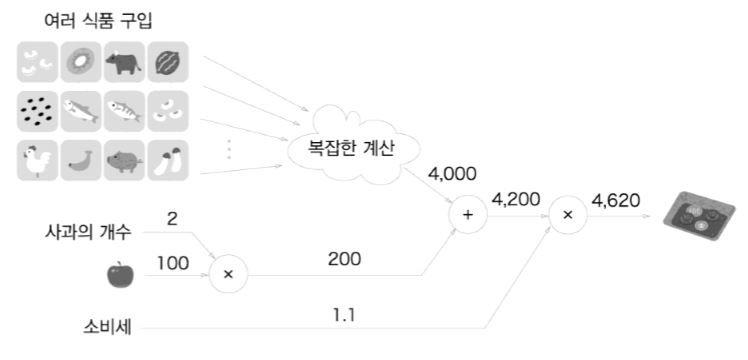

4000원 이라는 숫자가 어떻게 계산되었느냐와는 상관없이 사과가 어떻게 200원이 되었는가만 신경 쓰면 된다는 것이 국소적 계산이다


왜 계산 그래프로 문제를 해결 하는가? <br>전체가 아무리 복잡해도 각 노드에서 단순한 계산에 집중하여 문제를 단순화 시킬 수 있다.<br> (수치미분으로 하면 오~~~래 걸리기 때문에)<br><br>
실제로 계산 그래프를 사용하는 가장 큰 이유는?<br> 역전파를 통해서 미분을 효율적으로 계산할 수 있는 점에 있다<br>
예)<br> 사과값이 '아주 조금' 올랐을때 '지불금액'이 얼마나 증가하는지 알고 싶은 경우<br><br>
∂ 지불금액<br> ------------<br>∂ 사과값<br><br>
지불금액을 사과값으로 편미분하면 알 수 있다<br>
편미분하는 방법 : 계산 그래프로 역전파를 이용한다<br>
결과 : 사과값이 1원이 오르면 최종 금액은 2.2원이 오른다

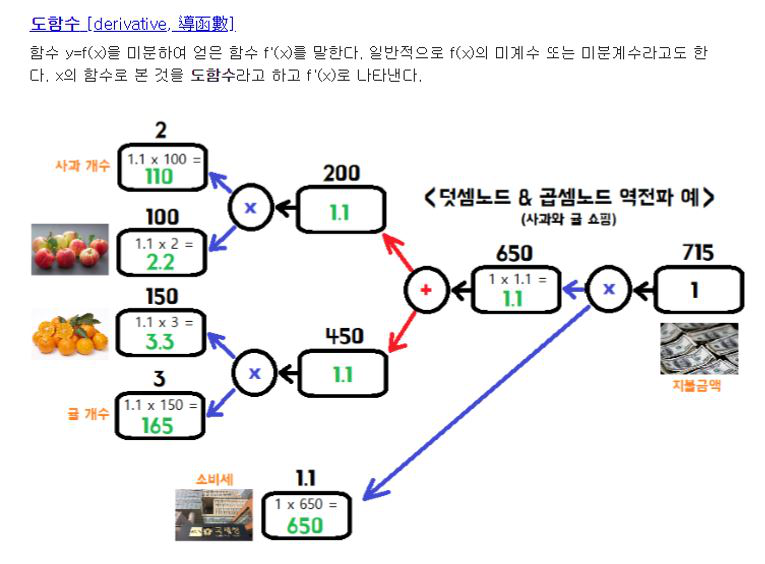

<br><br><br><br>

#### 문제 63) 곱셈계층을 파이썬으로 구현하시오


In [9]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    
    def backward(self, dout):
        dx = dout * self.y # x와 y를 바꾼다
        dy = dout * self.x
        return dx, dy
    
apple = 100
apple_num = 2
tax = 1.1
# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()
# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
print(price)

220.00000000000003


<br><br><br><br>

##### 문제64) 덧셈으로 파이썬구현

In [10]:
class AddLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1 
        dy = dout * 1
        return dx, dy

<br><br><br><br><br>

### 활성화함수 계층 구현하기

<br><br><br>

#### Relu 계층

" 0보다 큰 값이 입력되면 그 값을 그대로 출력하고 0 이거나 0보다 작은 값이 입력되면 0을 출력하 는 함수 "


<br><br>

##### 문제 65)  Relu 클래스를 생성하시오

In [11]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0) # x 에서 0보다 작은 값들에 True 들어감
        out = x.copy()
        out[self.mask] = 0 # out 에서 0보다 작은 값들 0 으로 바꿔줌

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

<br><br><br>

#### Sigmoid 계층

<br><br>

##### 문제 66) sigmoid 클래스를 생성하시오.

In [12]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out

        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

<br><br><br><br>

### Affine/Softmax 계층 구현하기

#### Affine 계층

신경망의 순전파 때 수행하는 행령의 내적은 기하학에서는 어파인 변환 이라고합니다.

그래서 신경망에서 입력값과 가중치의 내적의 합에 바이어스를 더하는 그 층을 Affine 계층이라고 한다.

지금까지의 계산그래프는 노드 사이에 '스칼라값' 이 흘렀는데 이에 반해 이번에는 '행렬' 이 흐르고있다


###### 문제 67) 위의 순전파의 역전파된 최종값인 dX와 dW를 각각 구하시오

In [13]:
import numpy as np
X = np.array([[1,2]])
W = np.array([[1,3,5], [2,4,6]])
b = np.array([[1,2,3]])
X_W_dot = np.dot(X, W)
print('X dot Y:', X_W_dot)
Y = X_W_dot + b
print('Y:', Y)
dY = np.array([[1,2,3]])
dX = np.dot(dY, W.T)
print('dX:', dX)
dW = np.dot(X.T, dY)
print('dW:', dW)

X dot Y: [[ 5 11 17]]
Y: [[ 6 13 20]]
dX: [[22 28]]
dW: [[1 2 3]
 [2 4 6]]


<br>

##### 문제 68) 아래의 행렬을 입력받아 결과를 출력하는 forward 함수를 생성하시오

In [14]:
def forward(X, W, b):
    out = np.dot(X, W) + b
    return out

print(forward(X, W, b))

[[ 6 13 20]]


In [15]:
def backward(X, W, dY):
    dX = np.dot(dY, W.T)
    print('dX(입력값에 대한 역전파):\n', dX)
    dW = np.dot(X.T, dY)
    print('dW(가중치에 대한 역전파):\n', dW)
    
X = np.array([[1,2], [3,4]]) # (2, 2)
W = np.array([[1,3,5], [2,4,6]]) # (2, 3)
b = np.array([[1,1,1]]) # (1, 3)
dY = np.array([[1,1,1], [2,2,2]]) # (2, 3)

backward(X, W, dY)

dX(입력값에 대한 역전파):
 [[ 9 12]
 [18 24]]
dW(가중치에 대한 역전파):
 [[ 7  7  7]
 [10 10 10]]


<br>

##### 문제 69)  Affine 클래스를 구현하시오

In [19]:
X = np.array([[1,2], [3,4]]) # (2, 2)
W = np.array([[1,3,5], [2,4,6]]) # (2, 3)
b = np.array([[1,1,1]])      # (1, 3)
dY = np.array([[1,1,1], [2,2,2]]) # (2, 3)

class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    # 순전파
    def forward(self, x):
        self.x = x
        Y = np.dot(x, self.W) + self.b

        return Y
    # 역전파
    def backward(self, dY):
        dx = np.dot(dY, self.W.T)
        self.dW = np.dot(X.T, dY)
        self.db = np.sum(dY, axis=0)

        return dx

affine1 = Affine(W, b) # 가중치와 바이어스로 신경망 객체 affine1을 생성한 것
print(affine1.forward(X))
print(affine1.backward(dY))

[[ 6 12 18]
 [12 26 40]]
[[ 9 12]
 [18 24]]


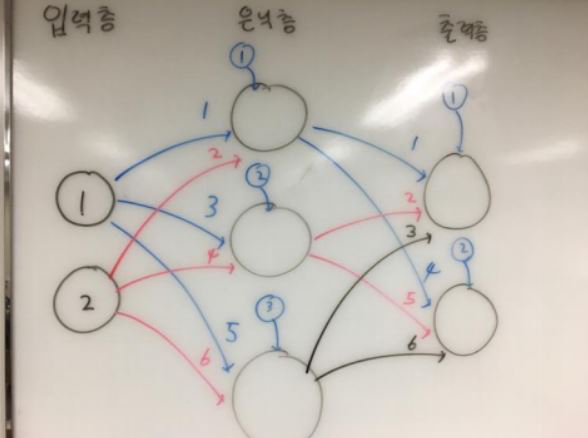

<br><br><br>

###### 문제 70) Affine 클래스를 이용해서 2층 신경망의 순전파를 구현하시오

In [22]:
x = np.array([[1,2]]) # (1, 2)
W1 = np.array([[1,3,5], [2,4,6]]) # (2, 3)
W2 = np.array([[1,4], [2,5], [3,6]]) # (3, 2)
b1 = np.array([[1,2,3]]) # (1, 3)
b2 = np.array([[1,2]]) # (1, 2)

layer_1 = Affine(W1, b1)
layer_2 = Affine(W2, b2)
out1 = layer_1.forward(x)
out2 = layer_2.forward(out1)
print(out2)

[[ 93 211]]


<br>

## 소프트 맥스 함수 계산 그래프

### Softmax 계층의 계산 그래프 (순전파만)

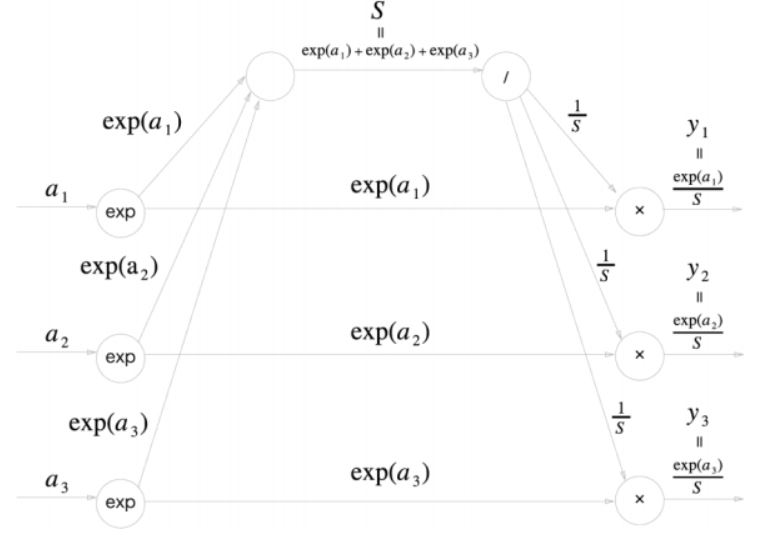

<br><br>

### Cross Entropy Error 게층의 계산 그래프 (순전파만)


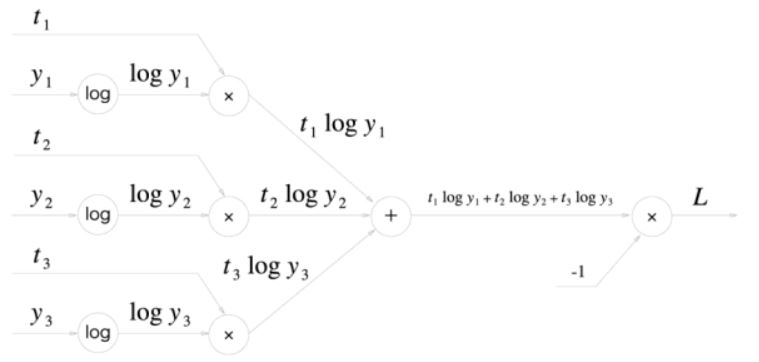

<br><br>

##### 문제 71)  class SoftmaxWithLoss 함수를 구현하시오

In [25]:
def softmax(a):
    c = np.max(a)
    minus = a - c
    np_exp = np.exp(minus)
    return np_exp

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실
        self.y = None # softmax의 출력
        self.t = None # 정답 레이블 (원-핫 벡터)

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size

        return dx

<br><br>

##### 문제 72)   위에서 만든 SoftmaxWithLoss 클래스를 객체화 시켜서 아래의 x(입력값), t(target value)를 입력해서 순전파의 오차율을 출력하고 역전파도 출력하시오

In [26]:
t = np.array([0,0,1,0,0,0,0,0,0,0]) # 숫자 2
x1 = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.05, 0.3, 0.1, 0.5])
x2 = np.array([0.01, 0.01, 0.9, 0.01, 0.01, 0.01, 0.05, 0.3, 0.1, 0.02])

soft_with_loss1 = SoftmaxWithLoss()
print(soft_with_loss1.forward(x2, t))
print(soft_with_loss1.backward())

-9.999999505838704e-08
[0.04106558 0.04106558 0.         0.04106558 0.04106558 0.04106558
 0.04274149 0.05488116 0.0449329  0.04147829]


<br><br><br><br>

### OrderDict() 함수의 이해<br><br>

OrderDict은 그냥 dictionary와는 다르게 입력된 데이터 뿐만 아니라 입력된 순서까지 같아야 동일 한 것으로 판단한다

In [27]:
# 예제
import collections
print('dict:')
d1 = {}
d1['a'] = 'A'
d1['b'] = 'B'
d1['c'] = 'C'
d1['d'] = 'D'
d1['e'] = 'E'
d2 = {}
d2['e'] = 'E'
d2['d'] = 'D'
d2['c'] = 'C'
d2['b'] = 'B'
d2['a'] = 'A'
print(d1)
print(d2)
print(d1 == d2)

dict:
{'a': 'A', 'b': 'B', 'c': 'C', 'd': 'D', 'e': 'E'}
{'e': 'E', 'd': 'D', 'c': 'C', 'b': 'B', 'a': 'A'}
True


   순전파 순서의 반대로 역전파가 되어야 하기 때문에 orderedDict 함수를 사용해야 한다
    
    순전파 :
    입력값 --> Affine1 계층 --> 시그모이드 --> Affine2 계층 --> 소프트맥스
    
    역전파:
    소프트맥스 --> Affine2 계층 --> 시그모이드 --> Affine1 계층

<br><br><br><br>

### 오차역전파를 이용한 2층 신경망 전체 코드<br><br>

클래스 이름: TwoLayerNet
1. 가중치와 바이어스를 초기화 하는 함수 (__init__)
2. 순전파를 진행하는 함수 (predict)
3. 비용(오차) 를 출력하는 함수 (loss)
4. 정확도를 출력하는 함수 (accuracy)
5. 오차역전파를 진행하는 함수 (gradient) <br><br><br><br>


##### 문제 73) 책 181~183페이지에 나오는 클래스 생성하시오 (점심시간 문제)

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])


        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : 
            t = np.argmax(t, axis=1)
            accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)

        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads
    
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)
network = TwoLayerNet(input_size = 784, hidden_size_1 = 50, hidden_size_2 = 100, output_size= 10)
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    grad = network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print(train_acc, test_acc)

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

    0.11805 0.1077
    0.8671166666666666 0.8732
    0.9168333333333333 0.9168
    0.9387 0.9373
    0.9517 0.9495
    0.9577666666666667 0.954
    0.96065 0.9575
    0.9692833333333334 0.9618
    0.9645333333333334 0.9577
    0.9747 0.9656
    0.9776333333333334 0.9667
    0.9771666666666666 0.9663
    0.9777833333333333 0.9664
    0.9814 0.9691
    0.9838666666666667 0.969
    0.9846333333333334 0.9685
    0.9849833333333333 0.9695

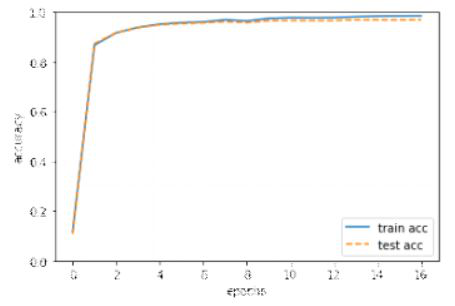